In [23]:
import pandas as pd
import os
from datetime import datetime, timedelta

In [24]:
# functions for calculating ELOs
def mov_multiplyer(elo_winner, elo_loser, score_winner, score_loser):
    mov = abs(score_winner-score_loser)
    elo_diff = elo_winner-elo_loser
    return ((mov+3)**0.8)/(7.5+0.006*(elo_diff))

def pr_winner_win(elo_winner, elo_loser):
    elo_diff = elo_loser - elo_winner
    return 1/(1+10**(elo_diff/400))

def post_elo_home_winner(elo_winner, elo_loser, score_winner, score_loser):
    return (elo_winner-100) + 20*(1-pr_winner_win(elo_winner, elo_loser))*mov_multiplyer(elo_winner, elo_loser, score_winner, score_loser)

def post_elo_away_winner(elo_winner, elo_loser, score_winner, score_loser):
    return elo_winner + 20*(1-pr_winner_win(elo_winner, elo_loser))*mov_multiplyer(elo_winner, elo_loser, score_winner, score_loser)

In [25]:
# Pull Season Games
games_path = os.path.join('..', 'Resources', '2014_games.csv')
games_2014 = pd.read_csv(games_path)
games_2014.GAME_DATE_EST = games_2014.GAME_DATE_EST.astype('datetime64')
games_2014

,Unnamed: 0,GAME_DATE_EST,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,PTS_away,HOME_TEAM_WINS
0,0,2014-10-28,1610612747,1610612745,2014,1610612747,90.0,108.0,0
1,1,2014-10-28,1610612759,1610612742,2014,1610612759,101.0,100.0,1
2,2,2014-10-28,1610612740,1610612753,2014,1610612740,101.0,84.0,1
3,3,2014-10-29,1610612757,1610612760,2014,1610612757,106.0,89.0,1
4,4,2014-10-29,1610612758,1610612744,2014,1610612758,77.0,95.0,0
...,...,...,...,...,...,...,...,...,...
1306,1306,2015-06-07,1610612744,1610612739,2014,1610612744,93.0,95.0,0
1307,1307,2015-06-09,1610612739,1610612744,2014,1610612739,96.0,91.0,1
1308,1308,2015-06-11,1610612739,1610612744,2014,1610612739,82.0,103.0,0
1309,1309,2015-06-14,1610612744,1610612739,2014,1610612744,104.0,91.0,1


In [26]:
# Pull ELO table
elo_path = os.path.join('..', 'Resources', '2014_elos.csv')
elos_2014 = pd.read_csv(elo_path)
elos_2014.DATE = elos_2014.DATE.astype('datetime64')
elos_2014

,Unnamed: 0,DATE,1610612739,1610612744,1610612745,1610612737,1610612764,1610612763,1610612741,1610612746,...,1610612754,1610612756,1610612766,1610612748,1610612760,1610612762,1610612758,1610612765,1610612743,1610612753
0,0,2014-10-28,1442.63,1574.5,1598.5,1479.44,1522.42,1566.78,1551.66,1624.02,...,1615.32,1551.66,1515.24,1598.5,1642.05,1377.58,1403.19,1411.37,1464.93,1359.48
1,1,2014-10-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2014-10-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2014-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2014-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,228,2015-06-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
229,229,2015-06-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230,230,2015-06-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
231,231,2015-06-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
pr_home_team_wins = []
pr_away_team_wins = []

for index, game_row in games_2014.iterrows():
    # block1
    game_day = game_row.GAME_DATE_EST
    home_score = game_row.PTS_home
    away_score = game_row.PTS_away

    if home_score > away_score:
        home_win = 1
    else:
        home_win = 0

    # print(game_day, home_score, away_score, home_win)

    # block2
    home_elo = [x for x in list(elos_2014[str(game_row.HOME_TEAM_ID)]) if x > 0][-1] + 100
    away_elo = [x for x in list(elos_2014[str(game_row.VISITOR_TEAM_ID)]) if x > 0][-1]

    # print(home_elo, away_elo)
    # block3
    if home_win == 1:
        # HOME WIN FUNCTION
        post_game_home_elo = round(post_elo_home_winner(home_elo, away_elo, home_score, away_score), 2)
        post_game_away_elo = round(away_elo + ((home_elo - 100) - post_game_home_elo), 2)
    elif home_win == 0:
        # AWAY WIN FUNCTION
        post_game_away_elo = round(post_elo_away_winner(away_elo, home_elo, away_score, home_score), 2)
        post_game_home_elo = round((home_elo - 100) + (away_elo - post_game_away_elo), 2)

    # print(post_game_home_elo, post_game_away_elo)
    next_day = game_day + timedelta(days=1)
    elos_2014.loc[list(elos_2014.DATE).index(next_day), str(game_row.HOME_TEAM_ID)] = post_game_home_elo
    elos_2014.loc[list(elos_2014.DATE).index(next_day), str(game_row.VISITOR_TEAM_ID)] = post_game_away_elo

    # create list of repsective win probabilities
    pr_home_team_wins.append(pr_winner_win(home_elo, away_elo))
    pr_away_team_wins.append(1-pr_winner_win(home_elo, away_elo))

pr_home_team_wins, pr_away_team_wins


13387662611417306,
  0.12784113031814515,
  0.5696436245611156,
  0.36307071342661035,
  0.6106761776517624,
  0.26457033355676374,
  0.26622008604550496,
  0.29270282951164617,
  0.6009301078679008,
  0.2296791828625474,
  0.183679504980235,
  0.2709810027814279,
  0.10181058495389683,
  0.3233203881590475,
  0.18513400444848271,
  0.7530436701113639,
  0.3004967293558767,
  0.14963417636642928,
  0.38133439121802937,
  0.06487043188017172,
  0.3145803299334373,
  0.4442653691117966,
  0.48940969266768464,
  0.30843222568983897,
  0.19357130314610027,
  0.2647495806497786,
  0.24155840059429523,
  0.6742188811220227,
  0.2511225676268316,
  0.2245863840210104,
  0.14930486207328075,
  0.30496825808166994,
  0.1636254359053867,
  0.4224580189879925,
  0.16393290384955783,
  0.6943235916016577,
  0.4646424769893016,
  0.10680054072065581,
  0.41070654155385333,
  0.29519978070771025,
  0.20493931435191914,
  0.05772985054279978,
  0.41745209490894475,
  0.3102524237912784,
  0.412895644

In [28]:
elos_2014.to_csv('output.csv')
pd.options.display.max_columns = None
elos_2014

,Unnamed: 0,DATE,1610612739,1610612744,1610612745,1610612737,1610612764,1610612763,1610612741,1610612746,1610612751,1610612749,1610612759,1610612757,1610612738,1610612742,1610612740,1610612761,1610612750,1610612752,1610612755,1610612747,1610612754,1610612756,1610612766,1610612748,1610612760,1610612762,1610612758,1610612765,1610612743,1610612753
0,0,2014-10-28,1442.63,1574.50,1598.50,1479.44,1522.42,1566.78,1551.66,1624.02,1522.42,1276.60,1670.88,1598.50,1377.58,1559.17,1450.15,1551.66,1493.79,1472.21,1320.34,1394.84,1615.32,1551.66,1515.24,1598.50,1642.05,1377.58,1403.19,1411.37,1464.93,1359.48
1,1,2014-10-29,NaN,NaN,1608.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1672.46,NaN,NaN,1557.59,1456.51,NaN,NaN,NaN,NaN,1384.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1353.12
2,2,2014-10-30,NaN,1585.99,1614.87,1475.44,1516.99,1569.78,1571.71,NaN,1505.97,1275.65,NaN,1610.26,1394.03,NaN,NaN,1555.66,1490.79,1452.16,1318.69,1380.07,1616.97,1556.44,1516.19,1603.93,1630.29,1371.20,1391.70,1405.97,1470.33,NaN
3,3,2014-10-31,1433.11,NaN,NaN,NaN,1523.54,NaN,NaN,1627.85,NaN,NaN,NaN,NaN,NaN,1561.59,NaN,NaN,1494.25,1461.68,NaN,NaN,NaN,NaN,NaN,NaN,1626.46,1367.20,NaN,1402.51,NaN,1346.57
4,4,2014-11-01,1448.36,NaN,NaN,NaN,NaN,1584.19,1556.46,1632.35,NaN,1284.97,1665.00,1595.97,NaN,NaN,NaN,NaN,NaN,NaN,1309.37,1375.57,1602.56,1563.90,NaN,NaN,NaN,NaN,1405.99,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,228,2015-06-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
229,229,2015-06-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230,230,2015-06-15,1694.18,1809.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
231,231,2015-06-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
elos_2014 = elos_2014.ffill(axis = 0)
elos_2014.to_csv('output.csv')
pd.options.display.max_columns = None
elos_2014
        

,Unnamed: 0,DATE,1610612739,1610612744,1610612745,1610612737,1610612764,1610612763,1610612741,1610612746,1610612751,1610612749,1610612759,1610612757,1610612738,1610612742,1610612740,1610612761,1610612750,1610612752,1610612755,1610612747,1610612754,1610612756,1610612766,1610612748,1610612760,1610612762,1610612758,1610612765,1610612743,1610612753
0,0,2014-10-28,1442.63,1574.50,1598.50,1479.44,1522.42,1566.78,1551.66,1624.02,1522.42,1276.60,1670.88,1598.50,1377.58,1559.17,1450.15,1551.66,1493.79,1472.21,1320.34,1394.84,1615.32,1551.66,1515.24,1598.50,1642.05,1377.58,1403.19,1411.37,1464.93,1359.48
1,1,2014-10-29,1442.63,1574.50,1608.49,1479.44,1522.42,1566.78,1551.66,1624.02,1522.42,1276.60,1672.46,1598.50,1377.58,1557.59,1456.51,1551.66,1493.79,1472.21,1320.34,1384.85,1615.32,1551.66,1515.24,1598.50,1642.05,1377.58,1403.19,1411.37,1464.93,1353.12
2,2,2014-10-30,1442.63,1585.99,1614.87,1475.44,1516.99,1569.78,1571.71,1624.02,1505.97,1275.65,1672.46,1610.26,1394.03,1557.59,1456.51,1555.66,1490.79,1452.16,1318.69,1380.07,1616.97,1556.44,1516.19,1603.93,1630.29,1371.20,1391.70,1405.97,1470.33,1353.12
3,3,2014-10-31,1433.11,1585.99,1614.87,1475.44,1523.54,1569.78,1571.71,1627.85,1505.97,1275.65,1672.46,1610.26,1394.03,1561.59,1456.51,1555.66,1494.25,1461.68,1318.69,1380.07,1616.97,1556.44,1516.19,1603.93,1626.46,1367.20,1391.70,1402.51,1470.33,1346.57
4,4,2014-11-01,1448.36,1585.99,1614.87,1475.44,1523.54,1584.19,1556.46,1632.35,1505.97,1284.97,1665.00,1595.97,1394.03,1561.59,1456.51,1555.66,1494.25,1461.68,1309.37,1375.57,1602.56,1563.90,1516.19,1603.93,1626.46,1367.20,1405.99,1402.51,1470.33,1346.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,228,2015-06-13,1699.12,1804.31,1649.72,1575.66,1540.76,1603.04,1586.26,1689.15,1453.43,1436.16,1714.22,1553.66,1519.97,1550.46,1521.23,1496.28,1257.26,1247.12,1272.26,1275.75,1506.59,1461.94,1396.63,1452.45,1579.56,1550.89,1411.16,1457.58,1416.94,1307.85
229,229,2015-06-14,1699.12,1804.31,1649.72,1575.66,1540.76,1603.04,1586.26,1689.15,1453.43,1436.16,1714.22,1553.66,1519.97,1550.46,1521.23,1496.28,1257.26,1247.12,1272.26,1275.75,1506.59,1461.94,1396.63,1452.45,1579.56,1550.89,1411.16,1457.58,1416.94,1307.85
230,230,2015-06-15,1694.18,1809.25,1649.72,1575.66,1540.76,1603.04,1586.26,1689.15,1453.43,1436.16,1714.22,1553.66,1519.97,1550.46,1521.23,1496.28,1257.26,1247.12,1272.26,1275.75,1506.59,1461.94,1396.63,1452.45,1579.56,1550.89,1411.16,1457.58,1416.94,1307.85
231,231,2015-06-16,1694.18,1809.25,1649.72,1575.66,1540.76,1603.04,1586.26,1689.15,1453.43,1436.16,1714.22,1553.66,1519.97,1550.46,1521.23,1496.28,1257.26,1247.12,1272.26,1275.75,1506.59,1461.94,1396.63,1452.45,1579.56,1550.89,1411.16,1457.58,1416.94,1307.85


In [30]:
import matplotlib.pyplot as plt

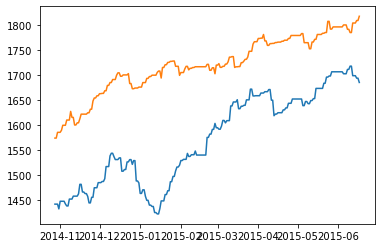

In [31]:
plt.plot(elos_2014.DATE, elos_2014['1610612739'])
plt.plot(elos_2014.DATE, elos_2014['1610612744'])

In [32]:
games_2014['PROB_HOME_WIN'] = pr_home_team_wins
games_2014['PROB_AWAY_WIN'] = pr_away_team_wins
games_2014

,Unnamed: 0,GAME_DATE_EST,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,PTS_away,HOME_TEAM_WINS,PROB_HOME_WIN,PROB_AWAY_WIN
0,0,2014-10-28,1610612747,1610612745,2014,1610612747,90.0,108.0,0,0.355096,0.644904
1,1,2014-10-28,1610612759,1610612742,2014,1610612759,101.0,100.0,1,0.771835,0.228165
2,2,2014-10-28,1610612740,1610612753,2014,1610612740,101.0,84.0,1,0.749807,0.250193
3,3,2014-10-29,1610612757,1610612760,2014,1610612757,106.0,89.0,1,0.580531,0.419469
4,4,2014-10-29,1610612758,1610612744,2014,1610612758,77.0,95.0,0,0.398794,0.601206
...,...,...,...,...,...,...,...,...,...,...,...
1306,1306,2015-06-07,1610612744,1610612739,2014,1610612744,93.0,95.0,0,0.757142,0.242858
1307,1307,2015-06-09,1610612739,1610612744,2014,1610612739,96.0,91.0,1,0.528535,0.471465
1308,1308,2015-06-11,1610612739,1610612744,2014,1610612739,82.0,103.0,0,0.547220,0.452780
1309,1309,2015-06-14,1610612744,1610612739,2014,1610612744,104.0,91.0,1,0.765158,0.234842


In [33]:
games_2014['dummy_home'] = [1 for i in range(len(games_2014))]
games_2014['dummy_away'] = [1 for i in range(len(games_2014))]

In [34]:
games_2014

,Unnamed: 0,GAME_DATE_EST,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,PTS_away,HOME_TEAM_WINS,PROB_HOME_WIN,PROB_AWAY_WIN,dummy_home,dummy_away
0,0,2014-10-28,1610612747,1610612745,2014,1610612747,90.0,108.0,0,0.355096,0.644904,1,1
1,1,2014-10-28,1610612759,1610612742,2014,1610612759,101.0,100.0,1,0.771835,0.228165,1,1
2,2,2014-10-28,1610612740,1610612753,2014,1610612740,101.0,84.0,1,0.749807,0.250193,1,1
3,3,2014-10-29,1610612757,1610612760,2014,1610612757,106.0,89.0,1,0.580531,0.419469,1,1
4,4,2014-10-29,1610612758,1610612744,2014,1610612758,77.0,95.0,0,0.398794,0.601206,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1306,1306,2015-06-07,1610612744,1610612739,2014,1610612744,93.0,95.0,0,0.757142,0.242858,1,1
1307,1307,2015-06-09,1610612739,1610612744,2014,1610612739,96.0,91.0,1,0.528535,0.471465,1,1
1308,1308,2015-06-11,1610612739,1610612744,2014,1610612739,82.0,103.0,0,0.547220,0.452780,1,1
1309,1309,2015-06-14,1610612744,1610612739,2014,1610612744,104.0,91.0,1,0.765158,0.234842,1,1


In [41]:
bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']
games_2014['home_bins'] = pd.cut(games_2014['PROB_HOME_WIN'], bins=bins, labels=labels)
games_2014['away_bins'] = pd.cut(games_2014['PROB_AWAY_WIN'], bins=bins, labels=labels)
games_2014

,Unnamed: 0,GAME_DATE_EST,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,PTS_away,HOME_TEAM_WINS,PROB_HOME_WIN,PROB_AWAY_WIN,dummy_home,dummy_away,home_bins,away_bins
0,0,2014-10-28,1610612747,1610612745,2014,1610612747,90.0,108.0,0,0.355096,0.644904,1,1,30-40,60-70
1,1,2014-10-28,1610612759,1610612742,2014,1610612759,101.0,100.0,1,0.771835,0.228165,1,1,70-80,20-30
2,2,2014-10-28,1610612740,1610612753,2014,1610612740,101.0,84.0,1,0.749807,0.250193,1,1,70-80,20-30
3,3,2014-10-29,1610612757,1610612760,2014,1610612757,106.0,89.0,1,0.580531,0.419469,1,1,50-60,40-50
4,4,2014-10-29,1610612758,1610612744,2014,1610612758,77.0,95.0,0,0.398794,0.601206,1,1,30-40,60-70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1306,1306,2015-06-07,1610612744,1610612739,2014,1610612744,93.0,95.0,0,0.757142,0.242858,1,1,70-80,20-30
1307,1307,2015-06-09,1610612739,1610612744,2014,1610612739,96.0,91.0,1,0.528535,0.471465,1,1,50-60,40-50
1308,1308,2015-06-11,1610612739,1610612744,2014,1610612739,82.0,103.0,0,0.547220,0.452780,1,1,50-60,40-50
1309,1309,2015-06-14,1610612744,1610612739,2014,1610612744,104.0,91.0,1,0.765158,0.234842,1,1,70-80,20-30


In [43]:
binned_grouped_df = games_2014.groupby(games_2014['home_bins']).sum()

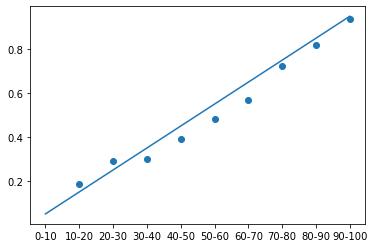

In [46]:
plt.scatter(labels, binned_grouped_df.HOME_TEAM_WINS/binned_grouped_df.dummy_home)
plt.plot([0, 9], [0.05, 0.95])

In [ ]:
def binomial_error(found_prob, num_obs):
    import math
    return 1.96*math.sqrt((found_prob*(1-found_prob))/num_obs)